# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [1]:
def F(n):
    for i in range(n):
        pad = '-' * (n - 1 - i)
        inn = ""
        for j in range(2 * i + 1):
            char = chr(ord('A') + abs(i - j))
            inn += char
        print(pad + inn + pad)

# Tests
F(10)
F(6)


---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [2]:

def F(d):
    print("Sorted by keys (ascending):")
    for key in sorted(d):
        x, y = d[key]
        print(f"-{key}-, -{x}-, -{y}-")
    print()
    print("Sorted by x values (descending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][0], reverse=True):
        print(f"-{key}-, -{x}-, -{y}-")
    print()  
    print("Sorted by y values (ascending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][1]):
        print(f"-{key}-, -{x}-, -{y}-")
    pass


# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by keys (ascending):
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x values (descending):
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y values (ascending):
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by keys (ascending):
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x values (descending):
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y values (ascending):
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [3]:
import pandas as pd

dt = pd.read_csv('student_records.csv')

print(dt.head(10))

   roll_number department  credit course_name      course_type grade
0       588946         MA       3       EC250  hasmed_elective    AB
1       145372         EP       4       EP407  hasmed_elective    CC
2       834515         MA       8       EP885  hasmed_elective    BB
3       344265        CSE       6      CSE699          honours    AB
4       358405         MA       3       EE460            minor    AP
5       781075         CE       8       CE540          honours    CC
6       180828        CSE       6       CE880            minor    AB
7       981238         MM       4      CSE226            minor    AB
8       836881         MM       8       MM530             core    AA
9       310604         EE       8       EE202             core    AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=9, BC=7, CC=6)

In [4]:

grade_to_points = {
    'AP': 10, 'AA': 10,
    'AB': 9,
    'BB': 8,
    'BC': 7,
    'CC': 6
}
dt_filtered = dt[dt['grade'].isin(grade_to_points.keys())]
dt_filtered['grade_points'] = dt_filtered['grade'].map(grade_to_points)
dt_filtered = dt_filtered[dt_filtered['course_type'] != 'minor']
dt_filtered = dt_filtered[dt_filtered['course_type'] != 'alc']
dt_filtered = dt_filtered[dt_filtered['course_type'] != 'honours']

dt_grouped = dt_filtered.groupby('roll_number').agg(
    total_credits=('credit', 'sum'),
    weighted_grade_points=('grade_points', lambda x: (x * dt_filtered.loc[x.index, 'credit']).sum())
)


dt_grouped['CPI'] = dt_grouped['weighted_grade_points'] / dt_grouped['total_credits']
dt_grouped['CPI'] = dt_grouped['CPI'].round(2)
print(dt_grouped[['total_credits', 'CPI']])
dt_grouped[['total_credits', 'CPI']].to_csv('student_cpi_results.csv')


             total_credits   CPI
roll_number                     
124663                 100  8.23
138296                 114  7.99
143142                 135  8.56
143856                 122  8.49
144528                 112  8.57
...                    ...   ...
981238                 120  8.28
986057                 148  7.93
993835                  99  8.42
995208                  88  7.59
998293                 150  8.56

[100 rows x 2 columns]


#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [5]:
course_types = {
    'core': 'core',
    'department_elective': 'department_elective',
    'flexible_elective': 'flexible_elective',
    'hasmed_elective': 'hasmed_elective'
}


dt_filtered = dt[dt['grade'].isin(grade_to_points.keys())]
dt_filtered = dt_filtered[
    (dt_filtered['course_type'] != 'minor') &
    (dt_filtered['course_type'] != 'alc') &
    (dt_filtered['course_type'] != 'honours')
]

dt_filtered = dt_filtered.sort_values(by=['roll_number', 'course_type'])


dt_grouped = dt_filtered.groupby(by='roll_number')

credits_by_course_type = dt_filtered.groupby(['roll_number', 'course_type'])['credit'].sum()

print(credits_by_course_type)

core_condition = credits_by_course_type.xs('core', level='course_type') >= 20
department_elective_condition = credits_by_course_type.xs('department_elective', level='course_type') >= 15
flexible_elective_condition = credits_by_course_type.xs('felxible_elective', level='course_type') >= 10
hasmed_elective_condition = credits_by_course_type.xs('hasmed_elective', level='course_type') >= 5

core_rolls = core_condition[core_condition].index
department_rolls = department_elective_condition[department_elective_condition].index
flexible_rolls = flexible_elective_condition[flexible_elective_condition].index
hasmed_rolls = hasmed_elective_condition[hasmed_elective_condition].index

core_rolls = core_rolls.get_level_values('roll_number').unique()
department_rolls = department_rolls.get_level_values('roll_number').unique()
flexible_rolls = flexible_rolls.get_level_values('roll_number').unique()
hasmed_rolls = hasmed_rolls.get_level_values('roll_number').unique()

valid_students = set(core_rolls) & set(department_rolls) & set(flexible_rolls) & set(hasmed_rolls)
print(valid_students)


roll_number  course_type        
124663       core                   53
             department_elective    22
             felxible_elective      19
             hasmed_elective         6
138296       core                   14
                                    ..
995208       hasmed_elective        28
998293       core                   24
             department_elective    55
             felxible_elective      31
             hasmed_elective        40
Name: credit, Length: 400, dtype: int64
{571782, 608522, 960395, 572815, 144528, 836881, 879634, 588946, 461971, 283796, 781075, 998293, 681499, 928288, 143142, 970791, 391848, 630568, 294697, 381227, 703403, 787967, 782129, 500658, 750259, 888886, 845623, 608952, 716985, 482623, 881983, 203200, 265922, 871746, 581065, 986057, 310604, 517837, 159438, 626000, 721490, 207443, 327122, 488661, 834515, 379479, 180828, 692318, 773982, 581858, 973158, 150503, 362471, 388969, 534763, 485484, 955757, 810863, 143856, 628849, 282482, 971123, 9

#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [6]:
minor_courses = dt[dt['course_type'] == 'minor']

minor_credits = minor_courses.groupby('roll_number')['credit'].sum()

students_with_minor = minor_credits[minor_credits >= 10]

print(students_with_minor.index)

Index([124663, 138296, 143142, 143856, 144528, 145372, 150503, 159438, 180828,
       194063, 199713, 203200, 207443, 208100, 214270, 265922, 270007, 282482,
       283796, 294697, 301135, 327122, 329535, 344265, 358405, 362471, 364146,
       379479, 381227, 381526, 388969, 391848, 458200, 461584, 461971, 465496,
       478606, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782,
       572815, 581065, 581858, 582912, 588946, 597353, 608522, 608952, 613401,
       626000, 628849, 630568, 680096, 681499, 692318, 703403, 716985, 718510,
       721490, 733782, 750259, 773982, 775967, 781075, 782129, 787967, 788020,
       810863, 816041, 834515, 836431, 836881, 841365, 845623, 847809, 851029,
       871746, 879634, 881983, 888886, 907454, 955757, 960395, 970791, 971123,
       973158, 981238, 986057, 993835, 995208, 998293],
      dtype='int64', name='roll_number')


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [7]:
minor_courses = dt[dt['course_type'] == 'minor']
Honor_courses = dt[dt['course_type'] == 'honours']

minor_credits = minor_courses.groupby('roll_number')['credit'].sum()
honor_credits = Honor_courses.groupby('roll_number')['credit'].sum()

students_with_minor = minor_credits[minor_credits >= 10]
students_with_honor = honor_credits[minor_credits >= 20]

students_with_both = students_with_minor.index.intersection(students_with_honor.index)

print(students_with_both)

Index([124663, 138296, 143142, 143856, 144528, 145372, 159438, 199713, 203200,
       208100, 214270, 265922, 270007, 283796, 301135, 329535, 344265, 358405,
       362471, 364146, 379479, 381227, 381526, 388969, 391848, 458200, 461584,
       461971, 465496, 478606, 482623, 500658, 517837, 521087, 571782, 572815,
       581065, 581858, 582912, 588946, 597353, 613401, 626000, 628849, 630568,
       680096, 681499, 703403, 716985, 718510, 721490, 733782, 773982, 775967,
       781075, 782129, 788020, 810863, 816041, 836431, 836881, 841365, 847809,
       879634, 881983, 888886, 907454, 955757, 960395, 970791, 971123, 973158,
       981238, 993835, 995208],
      dtype='int64', name='roll_number')


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [8]:
import numpy as np
from scipy.optimize import minimize
def objective(vars):
    x, y = vars
    return 2 * (x - y - 3) ** 2 + 4 * (x + 2 * y + 1) ** 4
def constraint1(vars):
    x, y = vars
    return x - y + 3
def constraint2(vars):
    x, y = vars
    return 5 - ((x + 2) ** 2 + (y + 1) ** 2)
initial_guess = [0, 0]
constraints = [
    {'type': 'ineq', 'fun': constraint1},  # Linear inequality
    {'type': 'ineq', 'fun': constraint2}   # Nonlinear inequality
]
result = minimize(objective, initial_guess, method='SLSQP', constraints=constraints)
if result.success:
    print(f"Optimal solution found: x = {result.x[0]:.4f}, y = {result.x[1]:.4f}")
    print(f"Minimum value of the objective function: f(x, y) = {result.fun:.4f}")
else:
    print("Optimization failed:", result.message)




Optimal solution found: x = 0.2349, y = -0.9285
Minimum value of the objective function: f(x, y) = 7.3450


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [9]:
import numpy as np
from scipy.integrate import quad

# Function to integrate (parametrized form of f(x, y) * ds)
def integrand(t):
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    ds = np.sqrt(3)  # sqrt((dx/dt)^2 + (dy/dt)^2)
    return (x**2 + y**4) * ds

# Integrate from 0 to 2*pi
result, _ = quad(integrand, 0, 2 * np.pi)
result


53.05363140385085

# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [10]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [11]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    spice = np.loadtxt(data_path, delimiter=',')
    return spice

In [12]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers):
    if init_centers is None:
        indices = np.random.choice(data.shape[0], K, replace=False)
        centers = data[indices]
    else:
        centers = np.array(init_centers)

    return centers

In [13]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    N = data.shape[0]  # Number of data points
    labels = np.ones(N, dtype=int)  # Initialize all labels to 1
    return labels

In [14]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):

    N = data.shape[0]  # Number of data points
    K = centers.shape[0]  # Number of cluster centers

    distances = np.sqrt(((data[:, np.newaxis, :] - centers) ** 2).sum(axis=2))  # Shape (N, K)

    return distances

In [15]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    labels = np.argmin(distances, axis=1)
    
    return labels

In [16]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = np.zeros((K, 2))
    
    for k in range(K):
        points_in_cluster = data[labels == k]  # Select points assigned to cluster k
        if len(points_in_cluster) > 0:
            centers[k] = np.mean(points_in_cluster, axis=0)
        else:
            centers[k] = np.zeros((1, 2))  # Handle empty clusters by setting default to zero (can be customized)
    
    return centers

In [17]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [18]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [19]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Cluster Centers')

    plt.title('K-means Clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    plt.legend()

    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0


<module 'matplotlib.pyplot' from 'c:\\Users\\Aytnihca\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

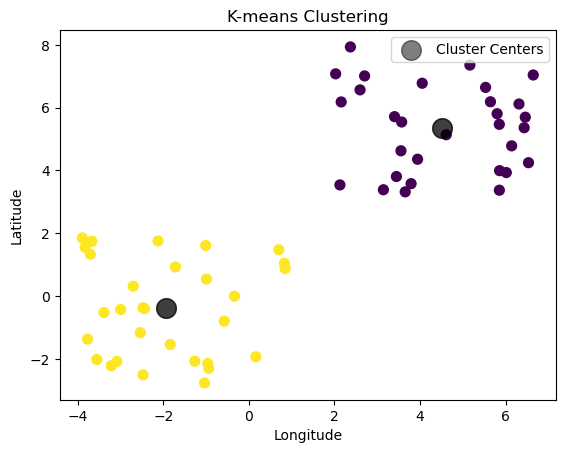

In [20]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)